# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [22]:
import pandas as pd 

df = pd.read_csv("data/weedprices01012015.csv")
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [23]:
import numpy as np
df['LowQ'].replace('I feel bad for these guys -->',np.NaN, inplace = True)
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

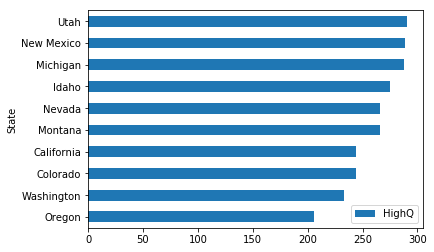

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
df.sort_values(by='HighQ',ascending=True).head(10).plot(kind = 'barh', y = 'HighQ', x = 'State')

## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

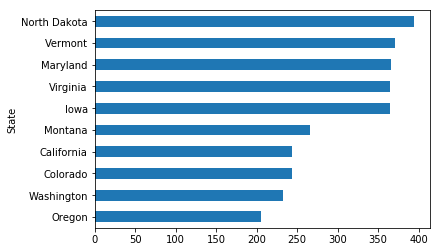

In [50]:
s1 = df.sort_values(by='HighQ',ascending=True).head(5) #least five
s2 = df.sort_values(by='HighQ',ascending=True).tail(5)
s3 = pd.concat([s1, s2], ignore_index = True)
s3.plot(legend=False, kind ='barh', y = 'HighQ', x = 'State')

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

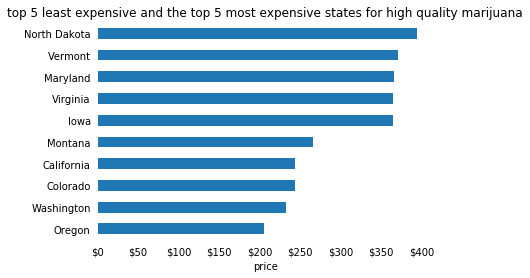

In [55]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
ax = s3.plot(legend=False, kind ='barh', y = 'HighQ', x = 'State')
ax.set_title('top 5 least expensive and the top 5 most expensive states for high quality marijuana')
ax.set_xlabel('price')
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    left= 'off')       # ticks along the top edge are off
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [27]:
import glob
filename = glob.glob('data/*.csv')
filename

['data/weedprices01012014.csv',
 'data/weedprices01012015.csv',
 'data/weedprices01022014.csv',
 'data/weedprices01022015.csv',
 'data/weedprices01032014.csv',
 'data/weedprices01042014.csv',
 'data/weedprices01052014.csv',
 'data/weedprices01062014.csv',
 'data/weedprices01062015.csv',
 'data/weedprices01072014.csv',
 'data/weedprices01072015.csv',
 'data/weedprices01082014.csv',
 'data/weedprices01092014.csv',
 'data/weedprices01102014.csv',
 'data/weedprices01112014.csv',
 'data/weedprices01122014.csv',
 'data/weedprices02012014.csv',
 'data/weedprices02012015.csv',
 'data/weedprices02022014.csv',
 'data/weedprices02022015.csv',
 'data/weedprices02032014.csv',
 'data/weedprices02042014.csv',
 'data/weedprices02052014.csv',
 'data/weedprices02062014.csv',
 'data/weedprices02062015.csv',
 'data/weedprices02072014.csv',
 'data/weedprices02072015.csv',
 'data/weedprices02092014.csv',
 'data/weedprices02102014.csv',
 'data/weedprices02112014.csv',
 'data/weedprices02122014.csv',
 'data/w

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [28]:
price_dfs = [pd.read_csv(csv) for csv in filename ]

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [29]:
price_dfs[0].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26


In [30]:
price_dfs[-1].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.15,1460,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37


## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [31]:
file_index = 0
for ds in price_dfs:
    ds['filename'] = filename[file_index]
    file_index += 1

price_dfs[-2]

# for filename, dataframe in zip(filename, price_dfs)
    #dataframe['filename']  = filename

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.42,1040,$198.68,932,$149.49,123,data/weedprices31122013.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices31122013.csv
2,Arizona,$303.33,1939,$209.35,1624,$189.45,222,data/weedprices31122013.csv
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices31122013.csv
4,California,$248.76,12082,$193.54,12792,$193.8,773,data/weedprices31122013.csv
5,Colorado,$236.33,2152,$195.51,1710,$215.04,127,data/weedprices31122013.csv
6,Connecticut,$348.04,1292,$274.75,1309,$257.36,91,data/weedprices31122013.csv
7,Delaware,$374.31,345,$226.25,273,$199.88,34,data/weedprices31122013.csv
8,District of Columbia,$352.26,433,$295.82,347,$213.72,39,data/weedprices31122013.csv
9,Florida,$306.43,6497,$220.01,5234,$158.26,514,data/weedprices31122013.csv


## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [32]:
df_all = pd.concat(price_dfs, ignore_index=True)

In [33]:
df_all.shape

(24990, 8)

## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [34]:
[df['filename'].str.extract('^data/weedprices(\d{2})(\d{2})(\d{4})\.+') for df in price_dfs]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


[     0   1     2
 0   01  01  2014
 1   01  01  2014
 2   01  01  2014
 3   01  01  2014
 4   01  01  2014
 5   01  01  2014
 6   01  01  2014
 7   01  01  2014
 8   01  01  2014
 9   01  01  2014
 10  01  01  2014
 11  01  01  2014
 12  01  01  2014
 13  01  01  2014
 14  01  01  2014
 15  01  01  2014
 16  01  01  2014
 17  01  01  2014
 18  01  01  2014
 19  01  01  2014
 20  01  01  2014
 21  01  01  2014
 22  01  01  2014
 23  01  01  2014
 24  01  01  2014
 25  01  01  2014
 26  01  01  2014
 27  01  01  2014
 28  01  01  2014
 29  01  01  2014
 30  01  01  2014
 31  01  01  2014
 32  01  01  2014
 33  01  01  2014
 34  01  01  2014
 35  01  01  2014
 36  01  01  2014
 37  01  01  2014
 38  01  01  2014
 39  01  01  2014
 40  01  01  2014
 41  01  01  2014
 42  01  01  2014
 43  01  01  2014
 44  01  01  2014
 45  01  01  2014
 46  01  01  2014
 47  01  01  2014
 48  01  01  2014
 49  01  01  2014
 50  01  01  2014,      0   1     2
 0   01  01  2015
 1   01  01  2015
 2   01  0

## Okay, now add all three columns back at once

You should rename the columns first!

In [35]:
dates = df_all['filename'].str.extract('^data/weedprices(\d{2})(\d{2})(\d{4})\.+')
df_all['day'] = dates[0]
df_all['mouth'] = dates[1]
df_all['year'] = dates[2]

df_all.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,day,mouth,year
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv,01,01,2014
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv,01,01,2014
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv,01,01,2014
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv,01,01,2014
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv,01,01,2014


## Plot the change in marijuana prices in Oregon over time

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


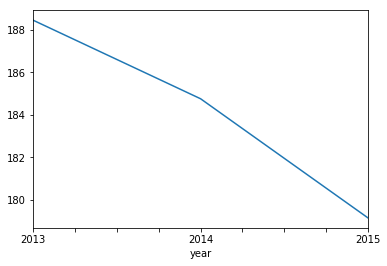

In [36]:
price_oregon = df_all[df_all['State'] =='Oregon']
price_oregon['MedQ'] = price_oregon['MedQ'].astype(str).str.replace("^\$", '')
price_oregon['MedQ'] = price_oregon['MedQ'].astype(float)
price_oregon.groupby('year')['MedQ'].mean().plot()

## Plot the change in marijuana prices in all states over time

In [37]:
df_all['MedQ'] = df_all['MedQ'].astype(str).str.replace("^\$", '')
df_all

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,day,mouth,year
0,Alabama,$339.06,1042,198.64,933,$149.49,123,data/weedprices01012014.csv,01,01,2014
1,Alaska,$288.75,252,260.6,297,$388.58,26,data/weedprices01012014.csv,01,01,2014
2,Arizona,$303.31,1941,209.35,1625,$189.45,222,data/weedprices01012014.csv,01,01,2014
3,Arkansas,$361.85,576,185.62,544,$125.87,112,data/weedprices01012014.csv,01,01,2014
4,California,$248.78,12096,193.56,12812,$192.92,778,data/weedprices01012014.csv,01,01,2014
5,Colorado,$236.31,2161,195.29,1728,$213.5,128,data/weedprices01012014.csv,01,01,2014
6,Connecticut,$347.9,1294,273.97,1316,$257.36,91,data/weedprices01012014.csv,01,01,2014
7,Delaware,$373.18,347,226.25,273,$199.88,34,data/weedprices01012014.csv,01,01,2014
8,District of Columbia,$352.26,433,295.67,349,$213.72,39,data/weedprices01012014.csv,01,01,2014
9,Florida,$306.43,6506,220.03,5237,$158.26,514,data/weedprices01012014.csv,01,01,2014


In [58]:
df['State']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                 Montana
21                Nebraska
22                  Nevada
23           New Hampshire
24              New Jersey
25              New Mexico
26                New York
27          North Carolina
28            North Dakota
29                    Ohio
30                Oklahoma
31                  Oregon
32                Maryland
33           Massachusetts
34                Michigan
35               Minnesota
36             Mississippi
3

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


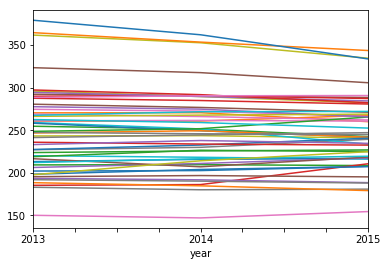

In [59]:
for state in df['State']:
    price_state = df_all[df_all['State'] == state]
    price_state['MedQ'] = price_state['MedQ'].astype(float)
    price_state.groupby('year')['MedQ'].mean().plot()